In [45]:
from fastai.tabular.all import *

In [46]:
import tensorflow as tf, pandas as pd, numpy as np, torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
def mean_absolute_percentage_error(y_true, y_pred):
    return torch.mean(torch.abs((y_true-y_pred) / y_true)) * 100.0

In [48]:
#df = pd.read_feather('D:/Skóli/lokaverkefni_vel/data/merged-test1month-26-2-24.feather')
df = pd.read_feather('E:\Skóli\HÍ\Vélaverkfræði Master HÍ\Lokaverkefni\Data\merged-full-25ms-24hr-28-2-24.feather')
df = df[df.f < df.fg]
df = df.dropna()
df['gust_factor'] = df.fg / df.f
df = df.drop(['f', 'fg', 'fsdev', 'd', 'dsdev', 'longitude', 'latitude', 'X', 'Y', 'time', 'stod'], axis = 1)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Brynjar Geir\AppData\Local\Temp\ipykernel_21704\224483694.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_feather('E:\Skóli\HÍ\Vélaverkfræði Master HÍ\Lokaverkefni\Data\merged-full-25ms-24hr-28-2-24.feather')


In [49]:
df

,ws_15,ws_250,ws_500,wd_15,wd_250,wd_500,p_15,p_250,p_500,t_15,t_250,t_500,Ri_01,Ri_12,N_01,N_12,gust_factor
0,19.6041,23.1354,23.5411,97.9485,99.3434,99.9549,98956.6580,96065.3307,93053.1580,272.2270,269.0631,266.6024,-0.593939,-1.137324,-0.000134,-0.000003,1.295181
1,14.4611,16.8599,17.1642,145.3825,146.3173,146.5913,100351.7109,97456.1563,94440.5234,275.0884,272.5074,270.0503,-0.422328,-1.799695,-0.000044,-0.000003,1.284157
2,8.5471,9.1812,9.1686,62.6103,65.3626,79.3139,100649.9705,97726.7943,94686.4939,273.2487,270.8995,268.9256,-1.177507,26685.778689,-0.000009,0.000068,1.283989
3,10.3157,11.1665,11.1894,88.1111,89.3584,90.2917,101001.3064,98070.3142,95018.0347,273.5012,270.9638,268.5380,-2.864259,233.822195,-0.000038,0.000002,1.317876
4,11.2918,17.3783,17.6068,116.0218,129.5856,136.2121,99682.9219,96849.4688,93917.3320,277.7801,277.3303,276.3435,0.412797,245.814617,0.000277,0.000205,1.354316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428,10.6554,11.5584,11.0643,6.4581,8.6411,12.4018,96755.1484,93969.3472,91068.2161,275.9923,272.9678,270.6434,-7.538465,4.194781,-0.000111,0.000016,1.302309
18429,25.4698,31.2753,33.5225,97.3362,98.8644,101.6907,99002.3281,96157.8359,93198.7578,276.0819,273.6194,271.7865,-0.042580,1.078334,-0.000026,0.000087,1.228657
18430,19.3720,22.8016,23.2493,41.1882,44.0706,46.2614,95774.5937,93026.4666,90165.3763,276.3821,273.9365,271.7808,-0.110178,12.661773,-0.000023,0.000041,1.283449
18431,23.5278,28.6951,29.9320,93.5311,95.0293,96.2047,97827.6385,94986.8069,92028.9293,273.8760,270.7487,268.4949,-0.264139,1.104732,-0.000128,0.000027,1.363419


In [50]:
y = df['fg']/df['f']
X = df.drop(['f', 'fg', 'd', 'stod'], axis = 1) #+ [f'Landscape_{i}' for i in range(70)] 'gust_factor',

KeyError: 'fg'

Changing the type of X,y so as to work with Tensorflow
X, y = X.values.astype(np.float32), y.values.astype(np.float32)

scaler = StandardScaler()

Assuming 'X' is your feature matrix and 'y' is your target variable
Replace 'X' and 'y' with your actual data

Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train[X_train.columns] = X_train_scaled
X_test[X_test.columns] = X_test_scaled

In [ ]:
y_names = 'gust_factor'
cont_names = df.columns[df.columns != y_names].tolist()
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
dls = TabularPandas(df, procs = [FillMissing, Normalize], cont_names = cont_names, y_names = y_names, splits = splits)
dls = dls.dataloaders()

SuggestedLRs(valley=0.0030199517495930195)

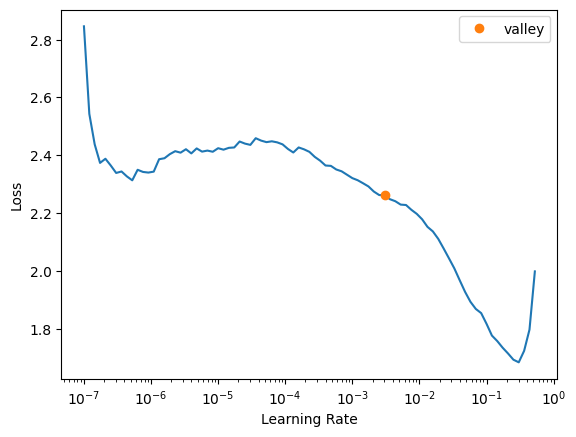

In [ ]:
learn = tabular_learner(dls, metrics = mean_absolute_percentage_error) #loss_func = mean_absolute_percentage_error,
lr = learn.lr_find()
lr

In [51]:
learn.fit_one_cycle(200, lr.valley)
preds, targs = learn.get_preds()

epoch,train_loss,valid_loss,mean_absolute_percentage_error,time
0,0.105645,0.126978,12.174016,00:01
1,0.101659,0.133335,13.341331,00:01
2,0.097346,0.157966,12.158669,00:01
3,0.090824,0.130145,21.139904,00:01
4,0.099291,0.136043,12.201646,00:01
5,0.099074,0.127828,12.266421,00:01
6,0.094698,0.128633,12.328636,00:01
7,0.096918,0.167144,13.090566,00:01
8,0.091767,0.152970,12.604975,00:01
9,0.100214,0.132817,13.066679,00:01


In [52]:
mape = mean_absolute_percentage_error(targs, preds)
print(f'The MAPE is {mape} %')

The MAPE is 11.689371109008789 %


In [ ]:
train_losses = learn.recorder.losses
val_losses = learn.recorder.val_losses

In [ ]:
df_history = pd.DataFrame([train_losses, val_losses], columns=['train_loss', 'valid_loss'])
df_history.to_csv('D:/Skóli/lokaverkefni_vel/code/model/saved_models/fastai_training_history.csv', index = False)

In [ ]:
learn.save('D:/Skóli/lokaverkefni_vel/code/model/saved_models/fastai_model')
learn.export('D:/Skóli/lokaverkefni_vel/code/model/saved_models/export_fastai.pkl')